## Artists Exploratory Data Analysis

The `artist.csv` file contains artists data fetched from the playlists from `playlist_filtered.csv` data.

This notebook includes:
- Remove collaboratorsand other non-bolivian artists.
- Top 5 Bolivian Artists.
- Top Genres.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('artists.csv')
df = df.sort_values(by='followers', ascending=False)
df = df.reset_index(drop=True)
df.shape

(271, 5)

In [3]:
df.head(10)

,artist_id,name,popularity,followers,genres
0,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,911077,[]
1,5ZAR5Usb11xw4KENbEE8uZ,Agua Marina,61,520635,"['cumbia peruana', 'pop peruano']"
2,43qxAkuKFB6fMNSeS5dO7Z,Ana Bárbara,67,510130,"['grupera', 'latin', 'mexican pop', 'ranchera']"
3,5xwugJ4uudppmOCCZateE5,Liberación,67,490466,"['banda', 'cumbia', 'grupera', 'gruperas inmor..."
4,6pVmT18pd1QaofDegZUEKX,La Nueva Luna,62,354542,"['argentine rock', 'cumbia villera']"
5,1bwsprbGyKx2vBbPAwVebl,Noche de Brujas,60,329380,"['cumbia chilena', 'cumbia ranchera']"
6,0CBKUzrf6yGdTgxAQbUUHS,Rafaga,64,328144,"['cumbia chilena', 'cumbia villera']"
7,3NLDQVyI2LVtQFJt8JeAAx,Guardianes Del Amor,59,305856,"['cumbia', 'cumbia sonidera', 'duranguense', '..."
8,1GlOpg3dPUft550esb82K3,Chaqueño Palavecino,61,259179,"['chamame', 'cumbia villera', 'folclore salten..."
9,6fBjnfeYEU3VFuQl8RPrp8,Samuray,59,225439,"['banda', 'cumbia', 'cumbia sonidera', 'durang..."


### Remove duplicates

In [4]:
duplicates = df[df.duplicated('name')].sort_values('name')
duplicates

,artist_id,name,popularity,followers,genres
142,3AZ0RKW5CVI2uD6Mr3ZLcD,America Pop,1,1025,['cumbia boliviana']
151,4bIAgnT0lu5DEyW5wjKhQr,Andesur,0,862,['salay']
258,5HSw372vFrMzaMKcPP0XZI,Miguel Angel ElGenio,14,19,[]
257,731CL04Ihoz7ALgmzdb7OG,Zckrap,4,20,[]


In [5]:
df = df.drop_duplicates(subset='name', keep='first')
df.shape

(267, 5)

### Remove non-Bolivian artists
All artists including substring of other countres in genere.

In [6]:
internationals = df[df.genres.str.contains('argentin|chile|colombia|mexic|peru|uruguay')]
df = df[~df.artist_id.isin(internationals.artist_id)]
print("Internationals", internationals.shape)
internationals[['name', 'genres']]

Internationals (30, 5)


,name,genres
1,Agua Marina,"['cumbia peruana', 'pop peruano']"
2,Ana Bárbara,"['grupera', 'latin', 'mexican pop', 'ranchera']"
3,Liberación,"['banda', 'cumbia', 'grupera', 'gruperas inmor..."
4,La Nueva Luna,"['argentine rock', 'cumbia villera']"
5,Noche de Brujas,"['cumbia chilena', 'cumbia ranchera']"
6,Rafaga,"['cumbia chilena', 'cumbia villera']"
7,Guardianes Del Amor,"['cumbia', 'cumbia sonidera', 'duranguense', '..."
8,Chaqueño Palavecino,"['chamame', 'cumbia villera', 'folclore salten..."
9,Samuray,"['banda', 'cumbia', 'cumbia sonidera', 'durang..."
10,Maniako,['mexican hip hop']


In [7]:
df.head(5)

,artist_id,name,popularity,followers,genres
0,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,911077,[]
14,4cCVNFShP38zaKGuo8QSMN,Inti-Illimani,53,168208,"['andean', 'latin rock', 'nueva cancion', 'tro..."
15,6gWVXK2R7WYXTqxULGAyfx,Illapu,59,164552,"['andean', 'latin rock', 'nueva cancion']"
17,58LNn3iNPmmHusH1EkyBm4,Maria Dolores Pradera,55,136410,"['bolero', 'cancion melodica', 'cantautor', 'f..."
18,37zUz0gjTaNCWTOymnuWGG,Jambao,56,134445,"['cuarteto', 'cumbia villera']"


## Manually excluded
Elements in the excluded files cointain artists from other countries and duplicates (with non equal) and other irrelevants.

In [8]:
excluded_artists = pd.read_csv('artists_excluded.csv')
excluded_artists.shape

(36, 5)

In [9]:
df = df[~df.artist_id.isin(excluded_artists.artist_id)]
df.shape

(204, 5)

In [10]:
df.iloc[range(50)]

,artist_id,name,popularity,followers,genres
21,0tkboyBYNymYytYlb9EXkN,Los Kjarkas,56,97077,"['andean', 'charango', 'folklore boliviano']"
28,30DQw23SjsbMLFlhia84jN,Elias Ayaviri,48,47069,['hip hop boliviano']
31,2oM7LqPaoCUcHHHnsTtgn1,Bonny Lovy,47,35314,"['cumbia boliviana', 'pop reggaeton']"
33,0hkFv9719WLJ2uupZTn0ru,Savia Andina,44,27731,"['andean', 'folklore boliviano']"
37,119DPASXtwEkIiAoRSOUR8,Proyección,43,19783,"['andean', 'folklore boliviano']"
41,7icDj3mEmk3X2phthD7iA2,Matamba,38,18036,"['bolivian rock', 'reggae en espanol']"
42,0SWtMcmZLgP04Kj5x0eCxa,azul azul,50,16351,['latin pop']
44,0vvNxX8NjBqBZeJk4Ni3xc,Kala Marka,39,15360,['andean']
45,1IYPsxunWpJvDYA1Por8dI,Diego Ríos,41,15293,['cumbia boliviana']
46,1pbcskpK1qePXm3sYvYu4o,Chila Jatun,42,14970,['andean']


## Exploratory Data Analysis

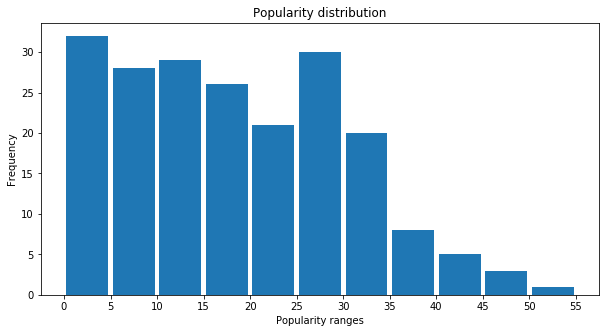

In [11]:
bins = np.arange(0, 60, 5)
ax = df.popularity.plot.hist(bins=np.arange(0, 60, 5), rwidth=0.9, figsize=(10,5));
ax.set_title('Popularity distribution');
ax.set_xlabel('Popularity ranges')
plt.xticks(bins, bins);

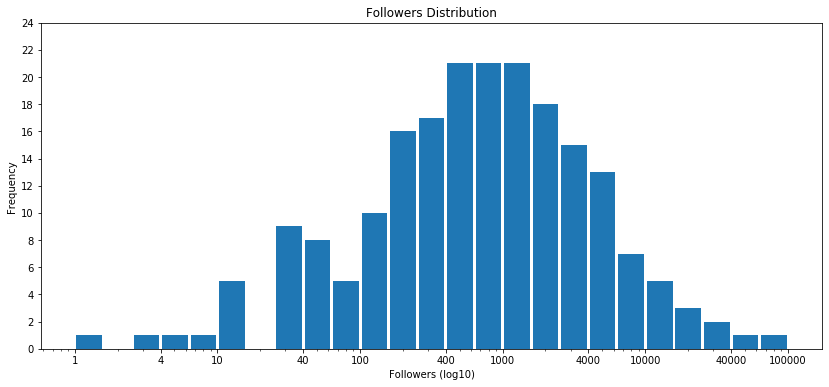

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(14,6))
plt.xscale('log')

positive_followers = df.followers[df.followers > 0]
positive_followers_log = np.log10(positive_followers)

bin_edges = 10 ** np.arange(0, positive_followers_log.max()+0.2, 0.2)
ax.hist(positive_followers, bins=bin_edges, rwidth=0.90)

xticks = [1,4,10, 40, 100, 400, 1000, 4000, 10000, 40000, 100000]
plt.xticks(xticks, xticks)
yticks = np.arange(0, 25, 2)
plt.yticks(yticks, yticks)
plt.title("Followers Distribution")
plt.ylabel("Frequency")
plt.xlabel("Followers (log10)");

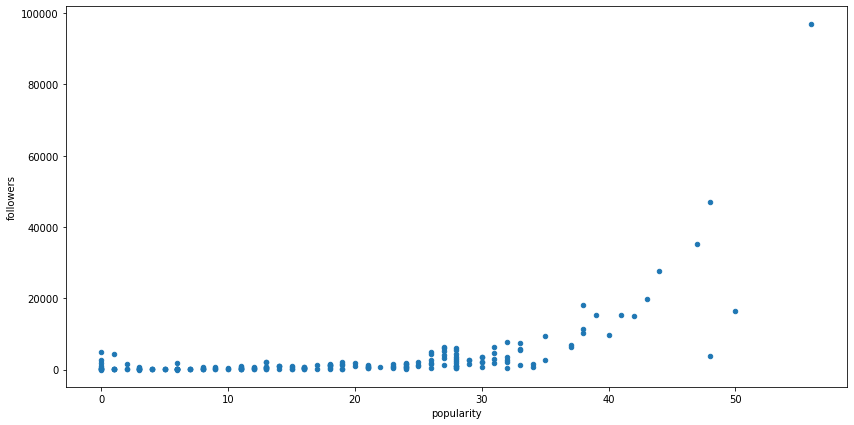

In [13]:
# Popularity vs Followers
ax = df.plot.scatter(x='popularity', y='followers', figsize=(14,7))

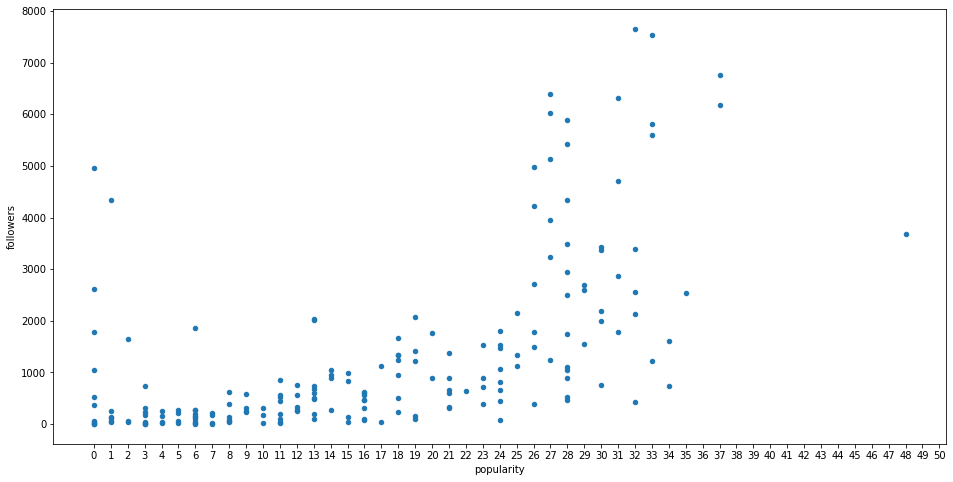

In [14]:
# Zoomed Popularity vs Followers
followers_limit = 8000
zoomed_data = (df.followers <= followers_limit)
ax = df[zoomed_data].plot.scatter(x='popularity', y='followers', figsize=(16,8))
plt.xticks(range(51), range(51));

## Genres

In [15]:
df.genres.value_counts()

[]                                                  46
['bolivian rock']                                   32
['cumbia boliviana']                                29
['folklore boliviano']                              24
['andean']                                          15
['indie boliviano']                                 11
['andean', 'folklore boliviano']                    10
['salay']                                            8
['bolivian rock', 'indie boliviano']                 7
['andean', 'charango']                               4
['charango']                                         3
['andean', 'charango', 'folklore boliviano']         2
['bolivian metal', 'latin metal']                    1
['cumbia boliviana', 'pop reggaeton']                1
['chamame']                                          1
['andean flute']                                     1
['andean', 'folklore boliviano', 'huayno']           1
['bolivian metal', 'bolivian rock']                  1
['andean',

In [16]:
from ast import literal_eval
df.genres = df.genres.apply(literal_eval)

(239, 5)


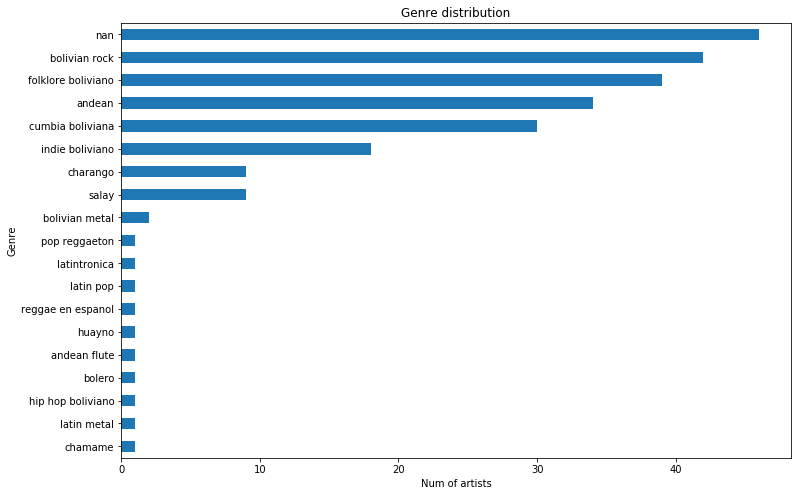

In [17]:
def plot_genre_dist(df):
    exploded = df.explode('genres')
    print(exploded.shape)
    ax = exploded.genres.value_counts(dropna=False).sort_values(ascending=True).plot.barh(figsize=(12,8))
    ax.set_xlabel('Num of artists'); ax.set_ylabel('Genre'); ax.set_title('Genre distribution');
plot_genre_dist(df)

In [18]:
no_genre = df[df.genres.apply(len) == 0]
no_genre

,artist_id,name,popularity,followers,genres
102,4DJ8AcSZKLky2Nckx8pTWV,Mc J Rap,32,2124,[]
133,3JfbO4rk0FLKe1zIiTgWAr,Andesur,33,1228,[]
139,5ifRgTaaAXxScj0lxS7wHK,Erick Claros,0,1045,[]
155,7yE1onzMbRs2x0PJtZ667p,Antares,30,758,[]
157,5kTdznt6MSAyjRzHrsw9GQ,Zckrap,34,744,[]
159,7rT2dg18W622J4n6jYcquY,Bolivia Band,13,732,[]
166,4otpYgHGWGKhfghlCo8bBh,Banda Intercontinental Poopó,16,623,[]
167,7nGJIrYTEJHOMex1dZG3o9,Illapa Reggae,8,614,[]
169,5ZvwK0ZabdNTC4CB4TeqSc,Bolivia,16,600,[]
187,0S7MwI5YpZTkhA5aiDm0uM,Jordan,32,420,[]


In [19]:
def append_genre(artist, genre):
    artist.genre[:]

assignments = [{
    'genre': 'folklore boliviano',
    'names': ['Andesur', 'Canto Popular', 'Antares', 'Bolivia', 'Banda Intercontinental Poopó']
}, {
    'genre': 'hip hop boliviano',
    'names': ['Mc J Rap', 'Zckrap', 'Erick Claros']
}, {
    'genre': 'merengue',
    'names': ['Bolivia Band']
}, {
    'genre': 'reggae en espanol',
    'names': ['Illapa Reggae']
}]

df_copy = df.copy()
for assignment in assignments:
    genre = assignment['genre']
    names = assignment['names']
    to_modify = df_copy.name.isin(names)
    df_copy[to_modify].genres.apply(lambda genres: genres.append(genre))
df_copy.iloc[:-20]

,artist_id,name,popularity,followers,genres
21,0tkboyBYNymYytYlb9EXkN,Los Kjarkas,56,97077,"[andean, charango, folklore boliviano]"
28,30DQw23SjsbMLFlhia84jN,Elias Ayaviri,48,47069,[hip hop boliviano]
31,2oM7LqPaoCUcHHHnsTtgn1,Bonny Lovy,47,35314,"[cumbia boliviana, pop reggaeton]"
33,0hkFv9719WLJ2uupZTn0ru,Savia Andina,44,27731,"[andean, folklore boliviano]"
37,119DPASXtwEkIiAoRSOUR8,Proyección,43,19783,"[andean, folklore boliviano]"
...,...,...,...,...,...
242,1bAItp0jYx6k2Bz1jV0muN,PliKa,2,54,[]
243,7gCnk0Ivq35DH5hDeh9qTM,Juan Lovera,4,49,[]
244,4Csbz9Fc5L9USnnAbyH0oZ,Motel Groove,1,48,[]
245,40yzYSCIcREdRV4SuDIDMP,Sumaya,11,48,[salay]


(239, 5)


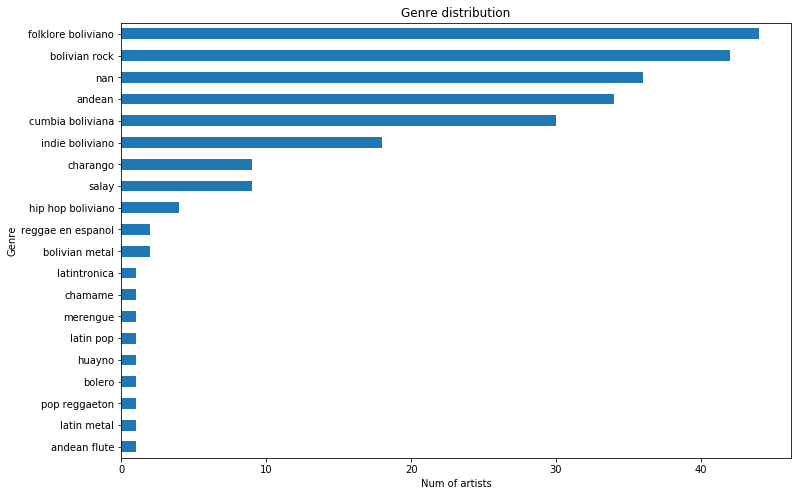

In [20]:
plot_genre_dist(df_copy)

In [21]:
df_copy.to_csv('artists_flitered.csv', index=False)